In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Load Files
#### Q1 - Q3

In [2]:
df_wti_daily= pd.read_csv('wti-daily.csv')
df_brent_daily= pd.read_csv('brent-daily.csv')

In [3]:
df_wti_daily.head(3)

,Date,Price
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53


In [4]:
df_brent_daily.head(3)

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55


# Preprocessing

## Check Duplicate Values

In [5]:
print('Wti_Daily dataset has duplicate values: ', df_wti_daily.duplicated().sum())
print('Brent_Daily dataset has duplicate values: ', df_brent_daily.duplicated().sum())

Wti_Daily dataset has duplicate values:  0
Brent_Daily dataset has duplicate values:  0


## Check Missing Values

In [6]:
print('Wti_Daily dataset has missing values: ', df_wti_daily.isnull().sum())
print('Brent_Daily dataset has missing values: ', df_brent_daily.isnull().sum())

Wti_Daily dataset has missing values:  Date     0
Price    0
dtype: int64
Brent_Daily dataset has missing values:  Date     0
Price    0
dtype: int64


## Setting Date as Index Column

In [7]:
# if 'Date' is already index column the reset it so you may rerun the code without getting an error
if df_wti_daily.index.name == 'Date':
   df_wti_daily = df_wti_daily.reset_index()

# if index is already the column then drop it
if 'index' in df_wti_daily.columns:
    df_brent_daily = df_wti_daily.drop(columns=['index'])
    
# set the 'Date' column as index
df_wti_daily= df_wti_daily.set_index('Date')
df_wti_daily.head()


,Price
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [8]:
# if 'Date' is already index column the reset it so you may rerun the code without getting an error
if df_brent_daily.index.name == 'Date':
    df_brent_daily = df_brent_daily.reset_index()
# if index is already the column then drop it
if 'index' in df_brent_daily.columns:
    df_brent_daily = df_brent_daily.drop(columns=['index'])
# set the 'Date' column as index
df_brent_daily = df_brent_daily.set_index('Date')

df_brent_daily.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


### Treat Date as dateTime Vlaue

In [9]:
# set it as DateTime Format (bcz slicing require the string into datetime Format, and slicing might not work correctly if we don't convert it in datetime format)
df_wti_daily.index = pd.to_datetime(df_wti_daily.index)

# Range from 19992 - 2002
df_wti_period = df_wti_daily.loc['1992-01-01' : '2002-12-31']

In [10]:
# set it as DateTime Format 
df_brent_daily.index = pd.to_datetime(df_brent_daily.index)

# Range from 1992 - 2002
df_brent_period = df_brent_daily.loc['1992-01-01' : '2002-12-31']

# Excercise Questions

## Q1. Plot the average price trend of oil from 1992-2002 from wtidaily.csv?


In [11]:
wti_yearly_price= df_wti_period.resample('YE').mean()
print(wti_yearly_price)

                Price
Date                 
1992-12-31  20.575564
1993-12-31  18.432200
1994-12-31  17.196429
1995-12-31  18.428805
1996-12-31  22.119173
1997-12-31  20.608254
1998-12-31  14.422072
1999-12-31  19.344980
2000-12-31  30.378520
2001-12-31  25.983120
2002-12-31  26.184960


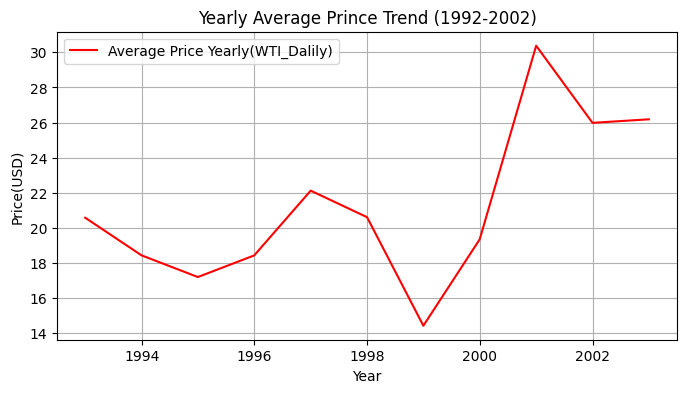

In [12]:
plt.figure(figsize=(8,4))
plt.plot(wti_yearly_price.index, wti_yearly_price['Price'], label='Average Price Yearly(WTI_Dalily)', color='red')
plt.title('Yearly Average Prince Trend (1992-2002)')
plt.xlabel('Year')
plt.ylabel('Price(USD)')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
brent_yearly_price = df_brent_period.resample('YE').mean()
print(brent_yearly_price)

                Price
Date                 
1992-12-31  19.319728
1993-12-31  17.013413
1994-12-31  15.856389
1995-12-31  17.015850
1996-12-31  20.639803
1997-12-31  19.108508
1998-12-31  12.758103
1999-12-31  17.901566
2000-12-31  28.660672
2001-12-31  24.455720
2002-12-31  24.993255


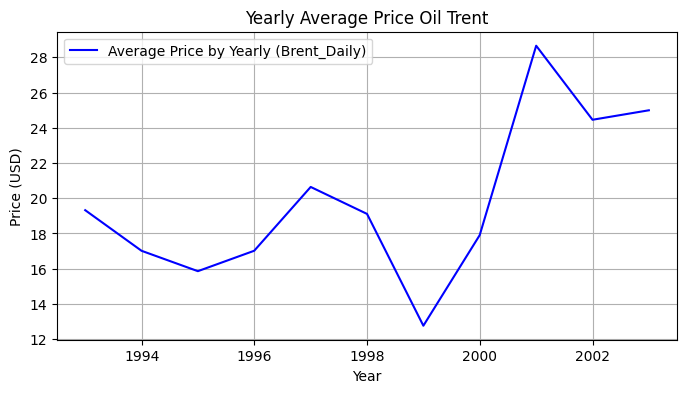

In [14]:
plt.figure(figsize=(8,4))
plt.plot(brent_yearly_price.index,brent_yearly_price['Price'], label= 'Average Price by Yearly (Brent_Daily)',color='blue')
plt.title('Yearly Average Price Oil Trent')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

## Comparison Between Prices

### Q3. Compare the both the average prices of a barrel of oil from 1992-2002, indicate significant differences though markers.

In [15]:
df_compare = pd.DataFrame(
   {
     'WTI':  wti_yearly_price['Price'],
     'Brent': brent_yearly_price['Price']
   }
).loc['1992-01-01' : '2002-12-31']

In [16]:
df_compare.head()

,WTI,Brent
Date,,
1992-12-31,20.575564,19.319728
1993-12-31,18.432200,17.013413
1994-12-31,17.196429,15.856389
1995-12-31,18.428805,17.015850
1996-12-31,22.119173,20.639803


In [17]:
# Calculate the difference
df_compare['Difference'] =  df_compare['Brent'] - df_compare['WTI']
print(df_compare)


                  WTI      Brent  Difference
Date                                        
1992-12-31  20.575564  19.319728   -1.255837
1993-12-31  18.432200  17.013413   -1.418787
1994-12-31  17.196429  15.856389   -1.340040
1995-12-31  18.428805  17.015850   -1.412955
1996-12-31  22.119173  20.639803   -1.479370
1997-12-31  20.608254  19.108508   -1.499746
1998-12-31  14.422072  12.758103   -1.663969
1999-12-31  19.344980  17.901566   -1.443414
2000-12-31  30.378520  28.660672   -1.717848
2001-12-31  25.983120  24.455720   -1.527400
2002-12-31  26.184960  24.993255   -1.191705


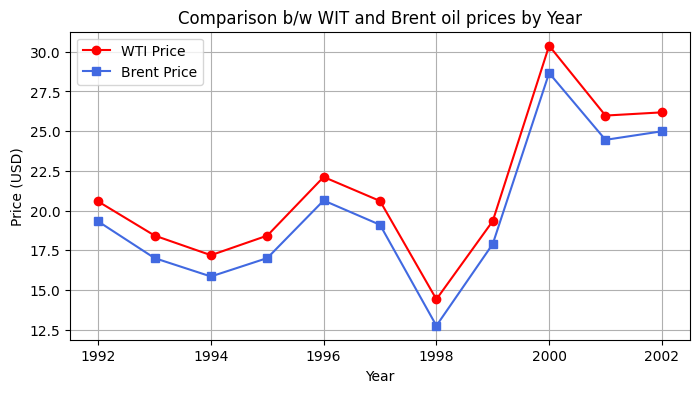

In [18]:
plt.figure(figsize=(8,4))
plt.plot(df_compare.index.year, df_compare['WTI'], marker='o', label='WTI Price', color= 'red')
plt.plot(df_compare.index.year, df_compare['Brent'], marker='s', label= 'Brent Price', color= 'royalblue')

plt.title('Comparison b/w WIT and Brent oil prices by Year')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

                  WTI      Brent  Difference
Date                                        
1998-12-31  14.422072  12.758103   -1.663969
2000-12-31  30.378520  28.660672   -1.717848


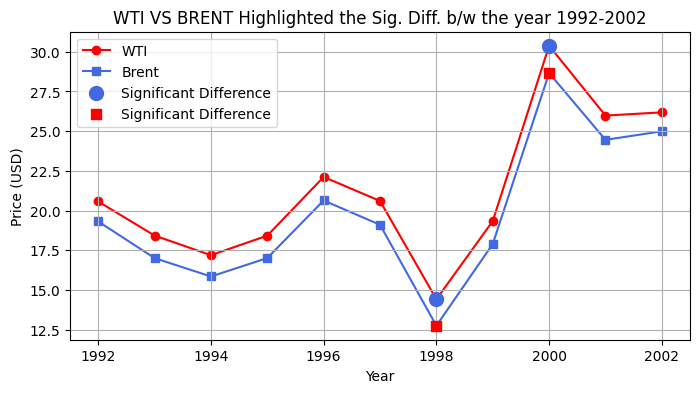

In [19]:
threshold= 1.6
# Filters theose lines having difference more than threshold
sig_diff= df_compare[abs(df_compare['Difference'])> threshold]
print(sig_diff)
plt.figure(figsize=(8,4))
plt.plot(df_compare.index.year, df_compare['WTI'], marker='o', color='red', label='WTI', zorder=1)
plt.plot(df_compare.index.year, df_compare['Brent'], marker='s', color='royalblue', label='Brent', zorder=1)

# Highliting the Significant Difference Year
plt.scatter(sig_diff.index.year, sig_diff['WTI'], label='Significant Difference', color='royalblue', marker='o', s=100, zorder=5)
plt.scatter(sig_diff.index.year, sig_diff['Brent'], label='Significant Difference', color='red', marker='s', s=50, zorder=5)

plt.title('WTI VS BRENT Highlighted the Sig. Diff. b/w the year 1992-2002')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

### Summary, Both have highly correlated behaviour in these years. there's no significant behaviour is observed except during 1998 to 2002.

# Q4: Plot the city wise distribution of sales, which city has contributed maximum in the sales.

In [20]:
df= pd.read_excel('sales.xlsx')
df.head(6)

,Invoice ID,Branch,City,Customer type,Gender,Product Code,Unit price,Quantity,Tax 5%,Total,Date,Payment,COGS,gross margin percentage,gross income,Rating
0,123-19-1176,A,Yangon,Member,Male,1,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4
1,699-14-3026,C,Naypyitaw,Normal,Male,1,85.39,7,29.8865,627.6165,2019-03-25,Ewallet,597.73,4.761905,29.8865,4.1
2,355-53-5943,A,Yangon,Member,Female,1,68.84,6,20.6520,433.6920,2019-02-25,Ewallet,413.04,4.761905,20.6520,5.8
3,315-22-5665,C,Naypyitaw,Normal,Female,1,73.56,10,36.7800,772.3800,2019-02-24,Ewallet,735.60,4.761905,36.7800,8.0
4,692-92-5582,B,Mandalay,Member,Female,1,54.84,3,8.2260,172.7460,2019-02-20,Credit card,164.52,4.761905,8.2260,5.9
5,829-34-3910,A,Yangon,Normal,Female,1,71.38,10,35.6900,749.4900,2019-03-29,Cash,713.80,4.761905,35.6900,5.7


In [21]:
print('Duplicate Values in the Dataset: ', df.duplicated().sum())

Duplicate Values in the Dataset:  0


In [22]:
print('Missing Values in the Dataset: ', df.isnull().sum())

Missing Values in the Dataset:  Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product Code               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Payment                    0
COGS                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [23]:
Unique_city= df['City'].unique()
print('Unique Cities: ', Unique_city)

Unique Cities:  ['Yangon' 'Naypyitaw' 'Mandalay']


In [24]:
# Group Total Sales with respect to City
Total_sales_by_city= df.groupby('City')['Total'].sum().sort_values(ascending= True)
print('Total Sales by City: ', Total_sales_by_city)

Total Sales by City:  City
Mandalay     106197.6720
Yangon       106200.3705
Naypyitaw    110568.7065
Name: Total, dtype: float64


106197.672
106200.3705
110568.7065


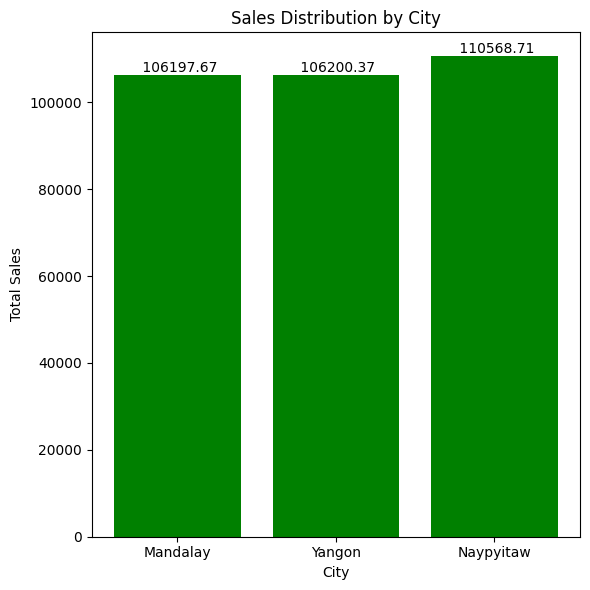

In [25]:
# Plot Graph

plt.figure(figsize=(6,6))
bars= plt.bar(Total_sales_by_city.index, Total_sales_by_city.values, color='green')

# Add labels above the bars

for bar in bars:
    height = bar.get_height()
    print(height) #ger bar height
    plt.text(
        bar.get_x()+bar.get_width()/2, # x-coordinate Center of Bar
        height, f'{height: .2f}',            # y-coordinate Value of Bar
        ha='center', va='bottom')

#Customise
plt.title('Sales Distribution by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

### => Above Visualization clearly indicates that NAYPYITAW City has highes sales distribution.

# Does payment methods have impact on sales, which payment method is contributing to the sales.

In [26]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product Code,Unit price,Quantity,Tax 5%,Total,Date,Payment,COGS,gross margin percentage,gross income,Rating
0,123-19-1176,A,Yangon,Member,Male,1,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4
1,699-14-3026,C,Naypyitaw,Normal,Male,1,85.39,7,29.8865,627.6165,2019-03-25,Ewallet,597.73,4.761905,29.8865,4.1
2,355-53-5943,A,Yangon,Member,Female,1,68.84,6,20.6520,433.6920,2019-02-25,Ewallet,413.04,4.761905,20.6520,5.8
3,315-22-5665,C,Naypyitaw,Normal,Female,1,73.56,10,36.7800,772.3800,2019-02-24,Ewallet,735.60,4.761905,36.7800,8.0
4,692-92-5582,B,Mandalay,Member,Female,1,54.84,3,8.2260,172.7460,2019-02-20,Credit card,164.52,4.761905,8.2260,5.9


In [27]:
Unique_payment= df['Payment'].unique()
print('Unique Payment Methods: ', Unique_payment)

Unique Payment Methods:  ['Ewallet' 'Credit card' 'Cash']


In [28]:
# Group Payment with Sales
Total_sales_by_payment= df.groupby('Payment')['Total'].sum().sort_values(ascending= True)
print('Total Sales with respect to Payment method: ', Total_sales_by_payment)

Total Sales with respect to Payment method:  Payment
Credit card    100767.072
Ewallet        109993.107
Cash           112206.570
Name: Total, dtype: float64


100767.072
109993.107
112206.56999999999


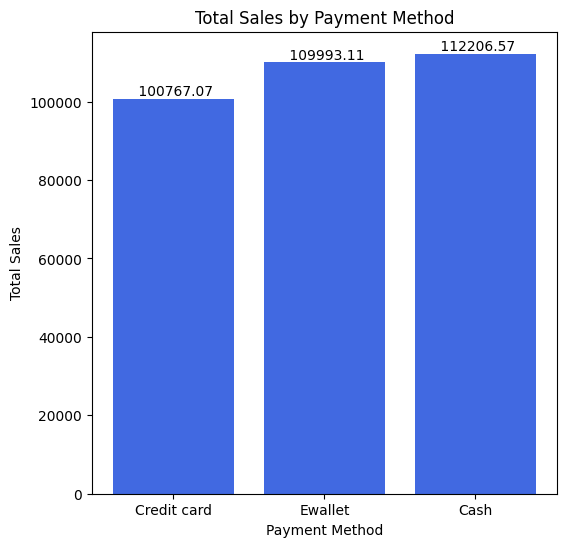

In [29]:
# plot Graph
plt.figure(figsize=(6,6))
bars= plt.bar(Total_sales_by_payment.index, Total_sales_by_payment.values, color='royalblue')

# Add labels above the bar
for bar in bars:
    height= bar.get_height()
    print(height)
    plt.text(
        bar.get_x()+bar.get_width()/2, # x-coordinate center of the Bar
        height, f'{height: .2f}',  # y-coordinate height of the Bar
        ha='center',va='bottom'      
    )

    
#Customise
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.show()

### CASH Method is clearly influencing/contributing the Sales more among other methods.

# Q6: Read the image '2.jpg' into a NumPy array, apply six different types of 'cmaps', and put these images six subplots.

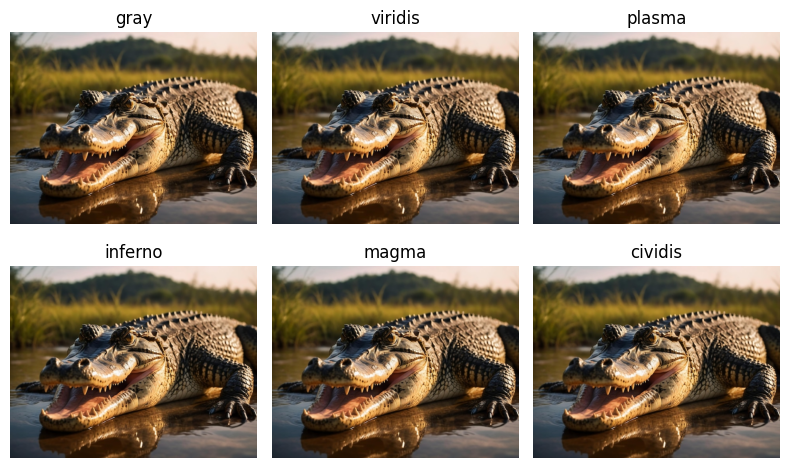

In [30]:
# Loading Image
img= plt.imread('2.jpg')

# List of colormpas
cmaps = ['gray', 'viridis', 'plasma', 'inferno', 'magma', 'cividis']

# plot the above cmaps

plt.figure(figsize=(8,5))

# Loop thorugh each colormao and subplot
for i, cmap in enumerate(cmaps):
    plt.subplot(2,3,i+1)  # 2 rows, 3 cols, index

    plt.imshow(img, cmap= cmap)
    plt.title(cmap)
    plt.axis('off')

# Display the final output
plt.tight_layout() # adjusts spacing between the objects
plt.show()


    

#### Q7. Apply six basic filters on image '2.jpg'. Put these six images into two subplots of the following format as:
#### total number of the rows are 3
#### 3 subplots in the 1st row, one sublot in the 2nd row and two subplots in the 3rd row.

<Figure size 1200x1000 with 0 Axes>

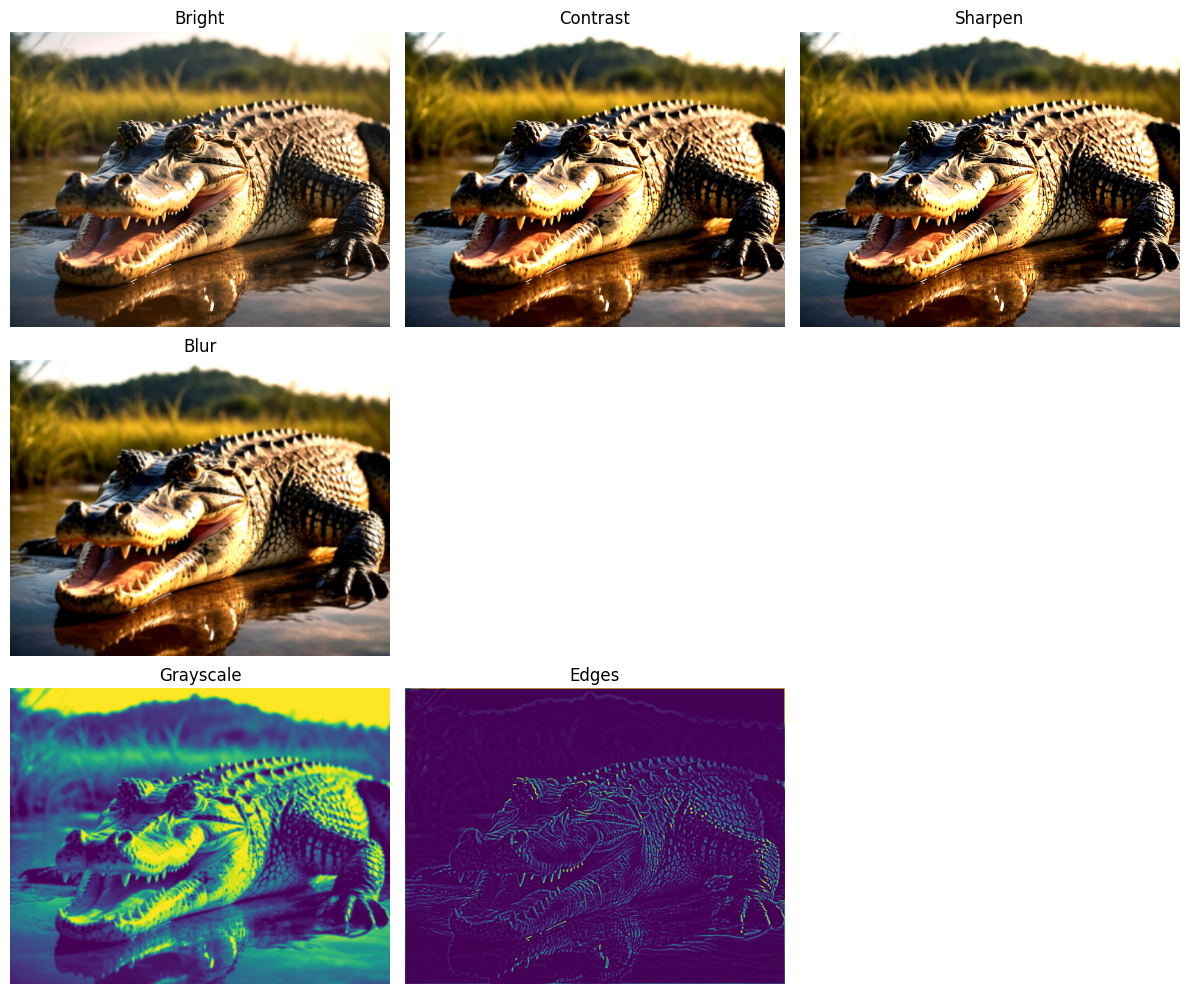

In [40]:
import matplotlib.image as mpimg
from PIL import Image, ImageEnhance, ImageFilter, ImageOps

# Load the image using matplotlib (NumPy array)
img = mpimg.imread('2.jpg')

# Convert NumPy array → PIL Image
pil_img = Image.fromarray(img)

# 1. Brightness adjustment
enhancer_brightness = ImageEnhance.Brightness(pil_img)
bright_img = enhancer_brightness.enhance(1.2)  # +20% brightness

# 2. Contrast adjustment
enhancer_contrast = ImageEnhance.Contrast(bright_img)
contrast_img = enhancer_contrast.enhance(1.3)  # +30% contrast

# 3. Sharpen the image
sharpened_img = contrast_img.filter(ImageFilter.SHARPEN)

# 4. Gaussian blur
blurred_img = sharpened_img.filter(ImageFilter.GaussianBlur(radius=1))

# 5. Convert to grayscale
gray_img = ImageOps.grayscale(blurred_img)

# 6. Edge detection
edges_img = gray_img.filter(ImageFilter.FIND_EDGES)

# 7. Resize (reduce size by 50%)
resized_img = blurred_img.resize((pil_img.width // 2, pil_img.height // 2))

# Show results
fig = plt.figure(figsize=(12, 10))

# Create subplots manually
# All six images (must be PIL Images)
images = [bright_img, contrast_img, sharpened_img, blurred_img, gray_img, edges_img]
titles = ["Bright", "Contrast", "Sharpen", "Blur", "Grayscale", "Edges"]

# Convert ALL to PIL just in case
images = [im if isinstance(im, Image.Image) else Image.fromarray(im) for im in images]

fig = plt.figure(figsize=(12, 10))

# Create subplots manually
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 7)
ax6 = fig.add_subplot(3, 3, 8)

axes = [ax1, ax2, ax3, ax4, ax5, ax6]

# Show images
for ax, im, title in zip(axes, images, titles):
    ax.imshow(im)
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.savefig('my_plot.png')
plt.show()